# Carteira de pedidos

### Base Relatório

In [1]:
# Bibliotecas python
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import locale
import csv
import os

In [2]:
# Variável com o caminho dos arquivos txt
arquivos_path = "Relatorios_pedidos/"

In [3]:
# Variável com o número de colunas dos arquivos
expected_number_of_columns = 31

### Base dos seis relatórios extraído do ERP

In [4]:
    # O código abaixo faz uma iteração por todos os arquivos no diretório especificado.
    # Primeiro, processa o arquivo r1.txt e os demais posteriormente.
    # e valida a definição do número de colunas.
    r1_file = os.path.join(arquivos_path, "r1.txt")
    if os.path.exists(r1_file):
        with open(r1_file, "r", encoding="iso-8859-1") as infile, open("temp.txt", "w", encoding="iso-8859-1", newline="") as outfile:
            reader = csv.reader(infile, delimiter="|")
            writer = csv.writer(outfile, delimiter="|")

            for row in reader:
                if len(row) == expected_number_of_columns:
                    writer.writerow(row)

    # Ler os outros arquivos no diretório
    for filename in os.listdir(arquivos_path):
        if filename.endswith(".txt") and filename != "r1.txt":
            with open(os.path.join(arquivos_path, filename), "r", encoding="iso-8859-1") as infile, open("temp.txt", "a", encoding="iso-8859-1", newline="") as outfile:
                reader = csv.reader(infile, delimiter="|")
                writer = csv.writer(outfile, delimiter="|")

                for row in reader:
                    if len(row) == expected_number_of_columns:
                        writer.writerow(row)

In [5]:
base = pd.read_csv("temp.txt", sep="|", encoding="iso-8859-1")

In [6]:
os.remove("temp.txt")

### Base de pedidos cancelados e pendentes 

In [7]:
# Valor da base original antes de qualquer tratamento
print("Base original de dados antes dos tratamentos: " + str(base.shape))

Base original de dados antes dos tratamentos: (1585357, 31)


In [8]:
base_c = pd.read_csv("Relatorio_cancelados/cancelados.txt", sep="|", encoding="iso-8859-1", low_memory=False)

In [9]:
base = base.merge(base_c[["Número", "St"]], left_on="Num Pedido", right_on="Número", how="left")

In [10]:
base_p = pd.read_csv("Relatorio_pendentes/pendentes.txt", sep="|", encoding="iso-8859-1")

In [11]:
base = base.merge(base_p[["Número", "Autorização"]], left_on="Num Pedido", right_on="Número", how="left")

In [12]:
base_linhas_st = (base["St"] == "C").value_counts()

In [13]:
# Quantidade de linhas com pedidos cancelados: 'True'
print(base_linhas_st)

St
False    1395300
True      190057
Name: count, dtype: int64


In [14]:
base_relatorio = base.drop(base[base["St"] == "C"].index)

In [15]:
base_linhas_pend = (base["Autorização"] == "P").value_counts()

In [16]:
# Quantidade de linhas com pedidos pendentes: 'True'
print(base_linhas_pend)

Autorização
False    1582557
True        2800
Name: count, dtype: int64


In [17]:
print("Base após remover pedidos cancelados: " + str(base_relatorio.shape))

Base após remover pedidos cancelados: (1395300, 35)


In [18]:
base_relatorio = base_relatorio.drop(base_relatorio[base_relatorio["Autorização"] == "P"].index)

In [19]:
#Base após remover incluidos
print("Base após remover pedidos pendentes: " + str(base_relatorio.shape))

Base após remover pedidos pendentes: (1392500, 35)


In [20]:
# Exclusão das linhas excedentes de relacionamentos
base_relatorio = base_relatorio.drop("Unnamed: 30", axis=1)
base_relatorio = base_relatorio.drop("Número_x", axis=1)
base_relatorio = base_relatorio.drop("St", axis=1)
base_relatorio = base_relatorio.drop("Número_y", axis=1)
base_relatorio = base_relatorio.drop("Autorização", axis=1)

In [21]:
# Manter datas vazias
base_relatorio = base_relatorio[pd.isna(base_relatorio["Data NFE"])]

In [22]:
print("Base após remover colunas excedentes: " + str(base_relatorio.shape))

Base após remover colunas excedentes: (147247, 30)


In [23]:
# Número de linhas vazias no campo Origem
numero_de_linhas_com_0 = (base_relatorio["Origem"] == 0).sum()

In [24]:
print(numero_de_linhas_com_0)

8


In [25]:
# Copia o número do pedido quando o valor da coluna "Origem" for igual a 0.
base_relatorio.loc[base_relatorio["Origem"] == 0, "Origem"] = base_relatorio["Num Pedido"]

In [26]:
numero_de_linhas_com_0 = (base_relatorio["Origem"] == 0).sum()

In [27]:
print(numero_de_linhas_com_0)

0


In [28]:
# Conversão das colunas para o tipo Datetime.
base_relatorio["Data"] = pd.to_datetime(base_relatorio["Data"], format="%d/%m/%Y", errors="coerce")
base_relatorio["Previsao"] = pd.to_datetime(base_relatorio["Previsao"], format="%d/%m/%Y", errors="coerce")
base_relatorio["Data Baixa"] = pd.to_datetime(base_relatorio["Data Baixa"], format="%d/%m/%Y", errors="coerce")

In [29]:
# Formata em data abreviada.
#base_relatorio["Data"] = base_relatorio["Data"].dt.strftime("%d/%m/%Y")
#base_relatorio["Previsao"] = base_relatorio["Previsao"].dt.strftime("%d/%m/%Y")
#base_relatorio["Data Baixa"] = base_relatorio["Data Baixa"].dt.strftime("%d/%m/%Y")

In [30]:
#pd.options.display.max_columns = None

In [31]:
#Consultados os dados da coluna Forma Aquisicao
base_linhas_FA = (base_relatorio["Forma Aquisicao"]).value_counts()

In [32]:
print(base_linhas_FA)

Forma Aquisicao
SI    66464
CC    34678
CD    26073
DT    20032
Name: count, dtype: int64


In [33]:
# Deletando os dados da coluna Forma Aquisicao.
base_relatorio["Forma Aquisicao"] = ''

In [34]:
base_linhas_FA = (base_relatorio["Forma Aquisicao"]).value_counts()

In [35]:
print(base_linhas_FA)

Forma Aquisicao
    147247
Name: count, dtype: int64


In [36]:
# Conversão para tipo float. 
base_relatorio["Valor"] = base_relatorio["Valor"].str.replace(".", "").str.replace(",", ".").astype(float)

In [37]:
# Ordena a coluna "Valor" do maior para o menor valor.
base_relatorio = base_relatorio.sort_values(by="Valor", ascending=False)

In [38]:
# Formata a coluna valor para o formato contábil R$
base_relatorio["Valor"] = base_relatorio["Valor"].map("R$ {:,.2f}".format).str.replace(".", "|").str.replace(",", ".").str.replace("|", ",")

In [39]:
print("Base_relatorio atualmente possui: " + str(base_relatorio.shape))

Base_relatorio atualmente possui: (147247, 30)


In [40]:
"""
   Esta função verifica se a coluna "Origem" tem campos nulos. Se não for nulo, a chave
   é criada combinando o dado convertido em string da coluna "Origem" com o dado em string
   da coluna "Cod. Produto". Se o dado da coluna "Origem" for nulo, a chave é criada combinando
   a versão em string do dado na coluna "Num Pedido" com o dado convertido em string do valor em
   'Cod. Produto'.
"""

def criar_chave(row):
    if pd.notna(row["Origem"]):
        origem_str = str(int(row["Origem"]))  # converte para string
        cod_produto_str = str(row["Cod. Produto"]) # converte para string
        return origem_str + cod_produto_str
    else:
        num_pedido_str = str(row["Num Pedido"])
        cod_produto_str = str(row["Cod. Produto"])
        return num_pedido_str + cod_produto_str # o retorno é uma concatenção entre dados de duas colunas

In [41]:
# Criando a nova coluna "Chave" aplicando a função a cada linha do dataframe
base_relatorio["Chave"] = base_relatorio.apply(criar_chave, axis=1)

In [42]:
# Reordenar colunas para a primeira posição
colunas = base_relatorio.columns.tolist()
colunas = ["Chave"] + [coluna for coluna in colunas if coluna != "Chave"]
base_relatorio = base_relatorio[colunas]

In [43]:
# Base pendentes.txt
base_p = pd.read_csv("Relatorio_pendentes/pendentes.txt", sep="|", encoding="iso8859-1")

In [44]:
# Buscando a coluna "Dcto" da base acima
base_relatorio = base_relatorio.merge(base_p[["Número", "Dcto"]], left_on="Num Pedido", right_on="Número", how="left")

In [45]:
# Buscando a coluna "Nome Usuário" da base "pendentes"
base_relatorio = base_relatorio.merge(base_p[["Número", "Nome Usuário"]], left_on="Num Pedido", right_on="Número", how="left")

In [46]:
# Reorganiza a coluna "Dcto" para posição +1 na referência da coluna "Chave"
colunas = list(base_relatorio.columns)
colunas.remove("Dcto")
colunas.insert(colunas.index("Chave") + 1, "Dcto")
base_relatorio = base_relatorio[colunas]

In [47]:
# Função para determinar o valor da coluna "Tipo Pedido" com base na validação
def determinar_tipo_pedido(row):
    if "7078" in str(row["Dcto"]) or "7069" in str(row["Dcto"]) or "7709" in str(row["Dcto"]):
        return "Automatico"
    else:
        return "Manual"

In [48]:
# Cria a nova coluna "Tipo Pedido" aplicando a função a cada linha do dataframe
base_relatorio["Tipo Pedido"] = base_relatorio.apply(determinar_tipo_pedido, axis=1)

In [49]:
# Reorganiza a coluna "Tipo Pedido" para posição +1 na referência da coluna "Dcto"
colunas = list(base_relatorio.columns)
colunas.remove("Tipo Pedido")
colunas.insert(colunas.index("Dcto") + 1, "Tipo Pedido")
base_relatorio = base_relatorio[colunas]

In [50]:
# Função para determinar o valor da coluna "Classificacao Pedido" com base na validação
def determinar_classificacao_pedido(row):
    if pd.isna(row["Origem"]) or row["Origem"] == '':
        return "Original"
    else:
        return "Saldo"

In [51]:
# Crie a nova coluna "Classificacao Pedido" aplicando a função a cada linha do dataframe
base_relatorio["Classificacao Pedido"] = base_relatorio.apply(determinar_classificacao_pedido, axis=1)

In [52]:
# Reorganize a coluna "Classificacao Pedido" para posição +1 na referência da coluna "Tipo Pedido"
colunas = list(base_relatorio.columns)
colunas.remove("Classificacao Pedido")
colunas.insert(colunas.index("Tipo Pedido") + 1, "Classificacao Pedido")
base_relatorio = base_relatorio[colunas]

In [53]:
# Reorganize a coluna "Nome Usuário" para posição +1 na referência da coluna "Classificacao Pedido"
colunas = list(base_relatorio.columns)
colunas.remove("Nome Usuário")
colunas.insert(colunas.index("Classificacao Pedido") + 1, "Nome Usuário")
base_relatorio = base_relatorio[colunas]

In [54]:
# Exclusão de colunas excedentes utilizadas em merges
base_relatorio = base_relatorio.drop("Número_x", axis=1)
base_relatorio = base_relatorio.drop("Número_y", axis=1)

In [55]:
# Colunas para remover dados duplicados
colunas_chave = ['Nome Usuário', 'Transacao', 'Origem', 'Fornecedor', 'Nome do Fornecedor', 'Data', 
                 'Previsao', 'Data Baixa', 'Data Criação Agenda', 'Status Agenda', 'Data Agenda', 
                 'Data NFE', 'Cod. Produto', 'Nome do Produto', 'Marca', 'Num Pedido', 'Unid', 'Qtde', 
                 'Qtde. Emb', 'Valor', 'Distribuicao', 'Forma Aquisicao', 'Departamento', 'Grupo', 
                 'Cod. Barras', 'NF-e Chave de Acesso', 'NF-e Transacao', 'NF-e Qtde', 'NF-e Valor', 
                 'Nº Nota Fiscal', 'Tipo Frete']

In [56]:
base_relatorio.shape

(147247, 35)

In [57]:
# Remoção de dados duplicados com base nas colunas especificadas na variável colunas_chave
base_relatorio = base_relatorio.drop_duplicates(subset=colunas_chave)

In [58]:
base_relatorio.shape

(106892, 35)

In [59]:
# Remova as duplicatas com base apenas na coluna "Chave"
base_relatorio = base_relatorio.drop_duplicates(subset="Chave")

In [60]:
base_relatorio.shape

(51749, 35)

In [61]:
# Exclusão de duas colunas pois não terá necessidade na última fase de tratamento para o dashboard
base_relatorio = base_relatorio.drop("Chave", axis=1)
base_relatorio = base_relatorio.drop("Dcto", axis=1)

In [62]:
base_relatorio.shape

(51749, 33)

In [63]:
# Obtém a data atual
data_atual = datetime.now()

In [64]:
# Calcula a data com até dois meses anteriores ao mês atual
data_limite_2_meses = data_atual - timedelta(days=data_atual.day + 1)
data_limite_2_meses = data_limite_2_meses.replace(day=1)

In [65]:
# Calcula a data com 7 dias inferior ao dia atual
data_limite_7_dias = data_atual - timedelta(days=8)

In [66]:
# Filtra o DataFrame com base nas condições especificadas
#base_pedidos = base_relatorio[(base_relatorio['Previsao'] < data_limite_2_meses) | ((base_relatorio['Previsao'] >= data_limite_2_meses) & (base_relatorio['Previsao'] < data_limite_7_dias))]
base_pedidos = base_relatorio[(base_relatorio['Previsao'] >= data_limite_2_meses) & (base_relatorio['Previsao'] >= data_limite_7_dias)]


In [67]:
base_relatorio = base_pedidos

In [68]:
base_relatorio.shape

(51364, 33)

In [69]:
# Caminho para salvar a base
caminho_arquivo_xlsx = "Base_relatorio/base_relatorio.xlsx"

In [70]:
# Salvando base tratada em excel
base_relatorio.to_excel(caminho_arquivo_xlsx, index=False)

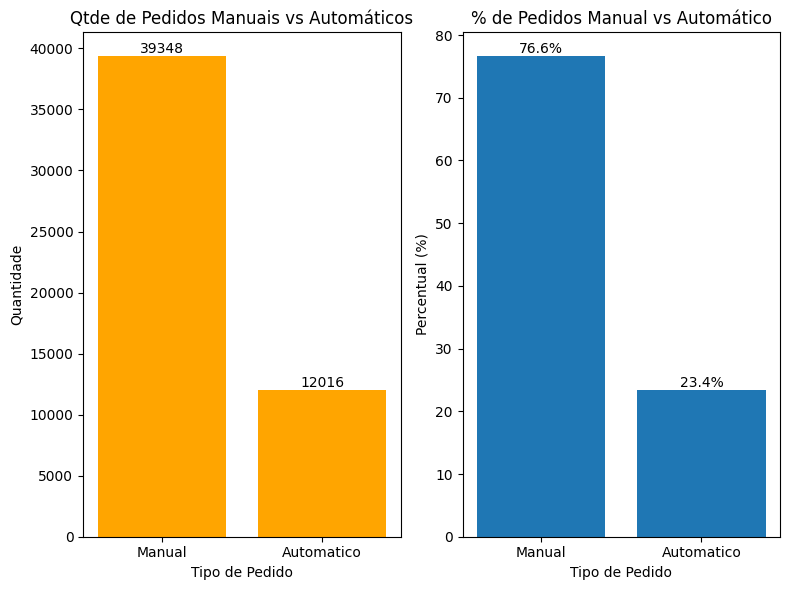

In [128]:
plt.figure(figsize=(8, 6)) 
contagem_tipo_pedido = base_relatorio['Tipo Pedido'].value_counts()

# Gráfico de quantidade
plt.subplot(121)
plt.bar(contagem_tipo_pedido.index, contagem_tipo_pedido.values, color="orange")
for x, y in zip(contagem_tipo_pedido.index, contagem_tipo_pedido.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.xlabel('Tipo de Pedido')
plt.ylabel('Quantidade')
plt.title('Qtde de Pedidos Manuais vs Automáticos')

# Gráfico de percentual
percentuais = (contagem_tipo_pedido / contagem_tipo_pedido.sum() * 100)
plt.subplot(122)
plt.bar(percentuais.index, percentuais.values)
for x, y in zip(percentuais.index, percentuais.values):
    plt.text(x, y, f'{y:.1f}%', ha='center', va='bottom')
plt.xlabel('Tipo de Pedido')
plt.ylabel('Percentual (%)')
plt.title('% de Pedidos Manual vs Automático')

plt.tight_layout()
plt.show()